In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_theme(font='Times New Roman', font_scale=1.2)
plt.rc("figure", autolayout=True)
# Chinese support
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
from sklearn import preprocessing
def norm(X):
    min_max_scaler = preprocessing.MinMaxScaler()
    X = min_max_scaler.fit_transform(X)
    return X
def standartize(X):
    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)
    return X

In [4]:
X = pd.read_csv('./clean1.data', header=None)
print(X.shape)
X.head()

(476, 169)


,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,MUSK-188,188_1+1,42,-198,-109,-75,-117,11,23,-88,...,-74,-129,-120,-38,30,48,-37,6,30,1.0
1,MUSK-188,188_1+2,42,-191,-142,-65,-117,55,49,-170,...,-302,60,-120,-39,31,48,-37,5,30,1.0
2,MUSK-188,188_1+3,42,-191,-142,-75,-117,11,49,-161,...,-73,-127,-120,-38,30,48,-37,5,31,1.0
3,MUSK-188,188_1+4,42,-198,-110,-65,-117,55,23,-95,...,-302,60,-120,-39,30,48,-37,6,30,1.0
4,MUSK-190,190_1+1,42,-198,-102,-75,-117,10,24,-87,...,-73,-127,51,128,144,43,-30,14,26,1.0


In [5]:
y = X[168].values
X.drop([0, 1, 168], axis=1, inplace=True)
data = X.values
print(data.shape)
data

(476, 166)


array([[  42, -198, -109, ...,  -37,    6,   30],
       [  42, -191, -142, ...,  -37,    5,   30],
       [  42, -191, -142, ...,  -37,    5,   31],
       ...,
       [  43, -102,  -20, ...,  -37,  -19,  -36],
       [  39,  -58,   27, ...,  -28,    3,   74],
       [  52, -121,  -24, ...,  -14,   12,   96]], dtype=int64)

## PCA 降维

In [6]:
def mypca(X, k):
    X = X - np.mean(X, 0)
    cov_mat = np.cov(X, rowvar=False)
    # column: variable, row: observations (num is N, div N-1)
    eigval, eigvec = np.linalg.eig(cov_mat)
    indices = np.argsort(eigval)
    eigval_k = eigval[indices[:-k-1:-1]]
    eigvec_k = eigvec[:, indices[:-k-1:-1]]
    contri = round(float(sum(eigval_k)/sum(eigval)), 2)
    return eigval_k, eigvec_k, contri

def contri_plot(X, maxk):
    contri_list = []
    for n in range(maxk):
        eigval_k, eigvec_k, contri = mypca(X, n)
        contri_list.append(contri)
    contri_growth = [round(contri_list[i] - contri_list[i-1], 2)
                     for i in range(1, maxk)]
    plt.figure(figsize=(8, 5), dpi=80)
    plt.plot(range(maxk), contri_list, 'r',
             lw=2.0, label='contributions list')
    plt.plot(range(1, maxk), contri_growth, 'b',
             lw=2.0, label='contributions growth')
    plt.legend(loc='best', frameon=False)
    plt.xlabel('Number of components')
    plt.savefig('./document/figure/contributions.pdf')
    plt.show()
    return contri_list, contri_growth

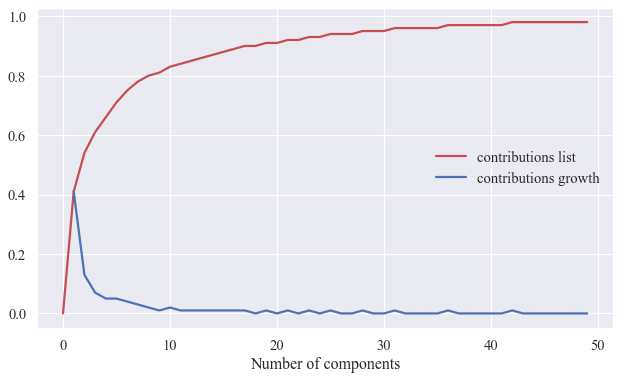

In [7]:
contri_list, contri_growth = contri_plot(data, 50)

In [8]:
eigval_k, eigvec_k, contri = mypca(data, 10)
print("dimension k:", len(eigval_k))
print("eigenvalues:\n", eigval_k,
      "\neigenvectors:\n", eigvec_k,
      "\ncontributions\n", contri)
newX = np.dot(data, eigvec_k)
print(newX)

dimension k: 10
eigenvalues:
 [453239.58247622 144753.81184437  77810.6275262   62335.68439338
  49078.05359872  46721.80964996  30678.16920381  23608.91285056
  18173.24933061  17244.43944881] 
eigenvectors:
 [[-6.07485616e-03 -5.92762401e-04 -2.15462256e-02 ...  4.79464045e-02
   6.02582645e-04 -6.07472613e-03]
 [-5.91429272e-02 -2.37599858e-02 -2.07846004e-01 ... -8.09154155e-02
  -2.62452795e-02  9.31827209e-02]
 [-6.62868505e-02 -1.79219018e-03 -1.30939223e-01 ... -7.71129850e-02
  -5.88707902e-03  4.99696908e-02]
 ...
 [-8.49513583e-06  5.05151914e-03 -3.66054356e-04 ... -2.79065762e-02
   1.85485732e-02 -5.89761968e-03]
 [-1.59190184e-03  1.69781919e-02 -1.94359625e-02 ...  7.22524663e-03
   3.58845327e-02 -5.20493901e-02]
 [ 7.30081669e-03 -7.01984258e-03 -5.28802497e-02 ... -9.06630591e-02
   5.94946628e-02  3.38688688e-02]] 
contributions
 0.83
[[ -174.76730063 -1178.51423646   592.11244167 ...   -92.3832692
    -49.03502241  -236.22487273]
 [ -189.64669851 -1185.56277833   5

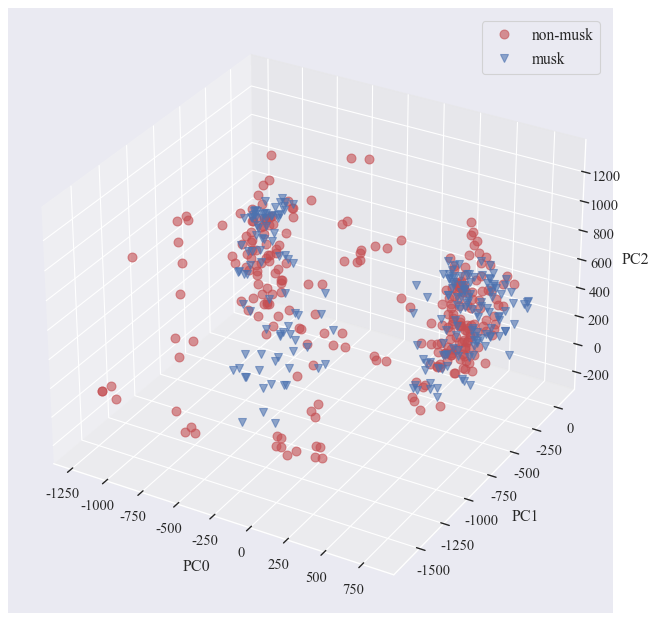

In [9]:
def plot_3D(X, y):
    rx, ry, rz=[], [], []
    bx, by, bz=[], [], []
    for i in range(len(X)):
        if y[i] ==0:
            rx.append(X[i][0])
            ry.append(X[i][1])
            rz.append(X[i][2])
        else:
            bx.append(X[i][0])
            by.append(X[i][1])
            bz.append(X[i][2])
    fig = plt.figure(figsize=(9, 8), dpi=80)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(rx, ry, rz, 'ro', markersize=8, alpha=0.6, label='non-musk')
    ax.plot(bx, by, bz, 'bv', markersize=8, alpha=0.6, label='musk')
    ax.set_xlabel('PC0', labelpad=10)
    ax.set_ylabel('PC1', labelpad=10)
    ax.set_zlabel('PC2', labelpad=10)
    plt.legend(loc='best', prop={'size':14},
               bbox_to_anchor=(0.99, 0.99))
    #plt.savefig('./document/figure/test.pdf')
    plt.show()

plot_3D(newX, y)

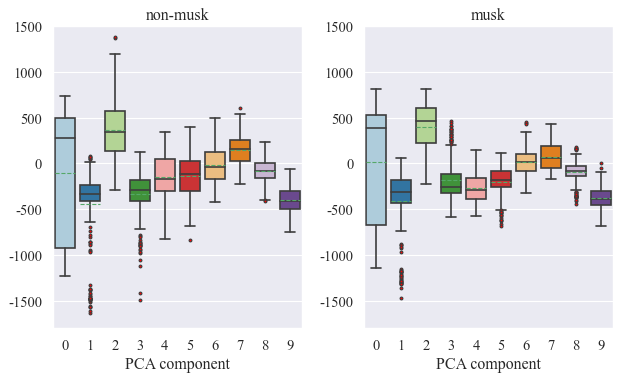

In [10]:
df = pd.DataFrame(newX)
df['tag'] = y
df1 = df[df['tag']==1]
df0 = df[df['tag']==0]
df0 = df0.drop(['tag'], axis=1)
df1 = df1.drop(['tag'], axis=1)

plt.figure(figsize=(8, 5), dpi=80)
plt.subplot(1,2,1)
sns.boxplot(data=df0, palette="Paired", 
            meanline=True, showmeans=True, 
            flierprops={'marker':'.', 
                        'markerfacecolor':'red',
                        'color':'black',})
plt.ylim(-1800, 1500)
plt.title('non-musk')
plt.xlabel('PCA component')
plt.subplot(1,2,2)
sns.boxplot(data=df1, palette="Paired",
            meanline=True, showmeans=True,
            flierprops={'marker':'.', 
                        'markerfacecolor':'red',
                        'color':'black',})
plt.ylim(-1800, 1500)
plt.title('musk')
plt.xlabel('PCA component')
plt.tight_layout()
#plt.savefig('./document/figure/boxplot_pca.pdf')
plt.show()

## SVD 降维

In [11]:
def calk(Sigma, percent):
    k = 0
    total = sum(np.square(Sigma))
    svss = 0 # singular values square sum
    for i in range(np.shape(Sigma)[0]):
        svss += np.square(Sigma[i])
        if (svss/total) >= percent:
            k = i + 1
            break
    return k

def SVD_DR(X):
    X = X - np.mean(X, 0)
    u, sigma, v = np.linalg.svd(X[:, :])
    k = calk(sigma, 0.9)
    newX = np.dot(u[:,:k], np.diag(sigma[:k]))
    return k, sigma, newX

k, sigma, newX = SVD_DR(data)
newX

array([[ -118.66637432,   750.09743105,   214.33802756, ...,
           19.44669189,  -145.26012079,   102.44151991],
       [ -133.54577219,   757.14597293,   187.45834702, ...,
           21.07132898,     4.07866674,  -132.80492299],
       [  -52.86381125,   730.1465061 ,   166.73381575, ...,
          -70.62167466,   -71.64807003,    61.13252226],
       ...,
       [-1015.04346527,  -205.96433511,   263.29590748, ...,
         -113.43285357,  -126.83625301,  -230.18256042],
       [  461.08175546,    -5.924472  ,  -600.04584626, ...,
          160.97093809,     1.40666757,   -21.51082042],
       [-1012.07885946,  -190.68339799,    39.42456023, ...,
          -63.4478099 ,   -84.43434068,  -163.80082521]])

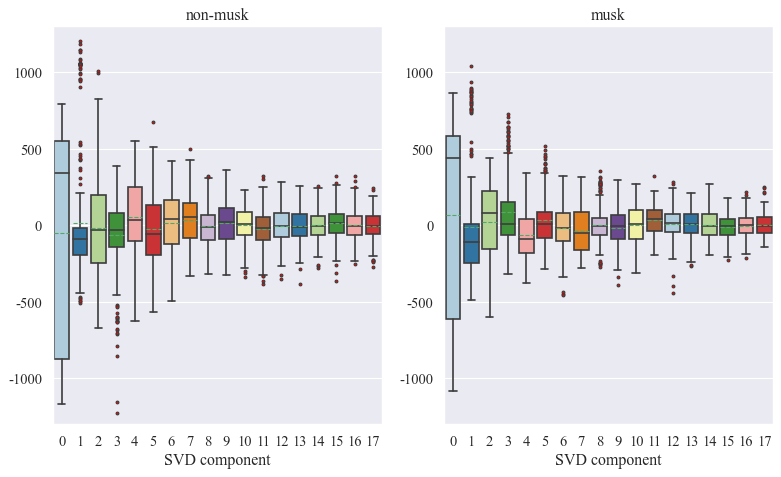

In [12]:
df = pd.DataFrame(newX)
df['tag'] = y
df1 = df[df['tag']==1]
df0 = df[df['tag']==0]
df0 = df0.drop(['tag'], axis=1)
df1 = df1.drop(['tag'], axis=1)

plt.figure(figsize=(10, 6.2), dpi=80)
plt.subplot(1,2,1)
sns.boxplot(data=df0, palette="Paired",
            meanline=True, showmeans=True,
            flierprops={'marker':'.', 
                        'markerfacecolor':'red',
                        'color':'black',})
plt.ylim(-1300, 1300)
plt.title('non-musk')
plt.xlabel('SVD component')
plt.subplot(1,2,2)
sns.boxplot(data=df1, palette="Paired",
            meanline=True, showmeans=True,
            flierprops={'marker':'.', 
                        'markerfacecolor':'red',
                        'color':'black',})
plt.ylim(-1300, 1300)
plt.title('musk')
plt.xlabel('SVD component')
plt.tight_layout()
#plt.savefig('./document/figure/boxplot_svd.pdf')
plt.show()

## sklearn 实现 PCA

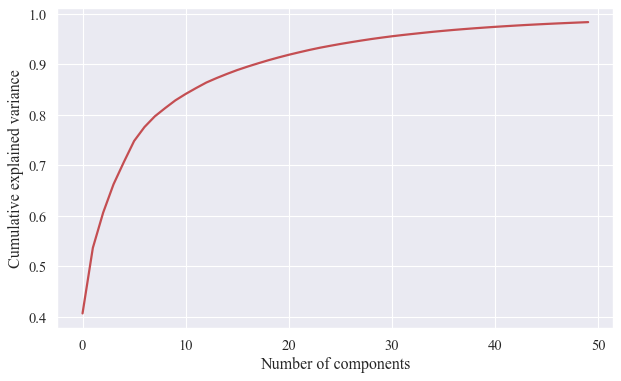

In [13]:
from sklearn.decomposition import PCA
def PCA_DR(X, k):
    X = X - np.mean(X, 0)
    pca = PCA(n_components=k, whiten=True)
    X = pca.fit_transform(X)
    ev = pca.explained_variance_ratio_
    return newX, ev

newX, ev = PCA_DR(data, 50)

plt.figure(figsize=(8, 5), dpi=80)
plt.plot(np.cumsum(ev), 'r', lw=2.0)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()